<h1 align="center">UST, Zewail City</h1>
<h2 align="center">CIE 555 (Spring 2022)</h2>
<h2 align="center">Lab 2 part#2: Regression using Neural Networks</h2>
<h2 align="center">Anhar Hasan</h2>


#Installation and import statements

In [1]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


     \ 17.8 MB 27.1 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.6 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=356239 sha256=d4811c89b0bc24881bdb1c2a0ecf367305b5affd3c1bab3b108aaa8ab09da147
  Stored in directory: /tmp/pip-ephem-wheel-cache-wxq_ut3s/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=22ad1ba9fc7c538599e68c8b92b1739a2f748e9fa8fd5c0f7bc8afba0ce2cb77
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built ydata-profiling htmlmin


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

import pandas_profiling as pp
from pandas_profiling import ProfileReport

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense

<ipython-input-2-8789a846d1cd>:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


#Dataset

The dataset used in this lab is Computer Hardware DataSet. We will build a model to predict the CPU performance based on initally 9 features which includes attributes like:  cycle time, memory size, etc.
The 10th feature; the ERP which is an integer that represents the Estimated Relative Performance of the CPU in-hand.



In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data'
column_names =  ['Vendors','Model_Name','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']

raw_dataset = pd.read_csv(url, names = column_names, na_values='?', comment='\t',sep=',', skipinitialspace=False)

In [4]:
dataset = raw_dataset.copy()
dataset.tail()

Vendors     Model_Name  MYCT  MMIN  MMAX  CACH  CHMIN  CHMAX  PRP  ERP
204  sperry           80/8   124  1000  8000     0      1      8   42   37
205  sperry  90/80-model-3    98  1000  8000    32      2      8   46   50
206  sratus             32   125  2000  8000     0      2     14   52   41
207    wang         vs-100   480   512  8000    32      0      0   67   47
208    wang          vs-90   480  1000  4000     0      0      0   45   25

##Exploratory data analysis

In [5]:
profile = ProfileReport(dataset)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
#No need to use this line here since we have no issing data, but I wrote it for your future reference.
dataset = dataset.dropna()

In [7]:
#  One hot encoding as we have caregorical values in the variable "Vendors"
dataset= pd.get_dummies(dataset, columns= ['Vendors'], prefix='Vendors', drop_first=False)

#For Ordinal hot encoding, uncomment the following two lines INSTEAD, and take care of the number of the input features then, they will be 8
#However it's NOT a correct practice here sincethere is no kind of order in the vendors.
#encoder = OrdinalEncoder()
#dataset.update(pd.DataFrame(encoder.fit_transform(dataset['Vendors'].values.reshape(-1,1)), columns = ['Vendors']))
dataset.head()

Model_Name  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP  \
0      32/60   125   256   6000   256     16    128  198  199   
1     470v/7    29  8000  32000    32      8     32  269  253   
2    470v/7a    29  8000  32000    32      8     32  220  253   
3    470v/7b    29  8000  32000    32      8     32  172  253   
4    470v/7c    29  8000  16000    32      8     16  132  132   

   Vendors_adviser  ...  Vendors_microdata  Vendors_nas  Vendors_ncr  \
0             True  ...              False        False        False   
1            False  ...              False        False        False   
2            False  ...              False        False        False   
3            False  ...              False        False        False   
4            False  ...              False        False        False   

   Vendors_nixdorf  Vendors_perkin-elmer  Vendors_prime  Vendors_siemens  \
0            False                 False          False            False   
1            False                 False          False            False   
2            False                 False          False            False   
3            False                 False          False            False   
4            False                 False          False            False   

   Vendors_sperry  Vendors_sratus  Vendors_wang  
0           False           False         False  
1           False           False         False  
2           False           False         False  
3           False           False         False  
4           False           False         False  

[5 rows x 39 columns]

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Model_Name            209 non-null    object
 1   MYCT                  209 non-null    int64 
 2   MMIN                  209 non-null    int64 
 3   MMAX                  209 non-null    int64 
 4   CACH                  209 non-null    int64 
 5   CHMIN                 209 non-null    int64 
 6   CHMAX                 209 non-null    int64 
 7   PRP                   209 non-null    int64 
 8   ERP                   209 non-null    int64 
 9   Vendors_adviser       209 non-null    bool  
 10  Vendors_amdahl        209 non-null    bool  
 11  Vendors_apollo        209 non-null    bool  
 12  Vendors_basf          209 non-null    bool  
 13  Vendors_bti           209 non-null    bool  
 14  Vendors_burroughs     209 non-null    bool  
 15  Vendors_c.r.d         209 non-null    bo

In [9]:
#Drop the column of the labels "ERP", and Model_Name since we actually don't need it.
x_data= dataset.drop(columns=['ERP', 'Model_Name'], axis=1)
y_data= dataset['ERP']
#Splitting the data to train and validation
train_features,val_features, train_targets,val_targets=train_test_split(x_data,y_data,test_size=0.2)
train_targets= np.array(train_targets).reshape(-1,1)
val_targets= np.array(val_targets).reshape(-1,1)

#Feature and target scaling
feature_scaler= StandardScaler().fit(train_features)
train_features= feature_scaler.transform(train_features)
val_features= feature_scaler.transform(val_features)

target_scaler= StandardScaler().fit(train_targets)
train_targets=target_scaler.transform(train_targets)
val_targets=target_scaler.transform(val_targets)

#Tensorflow model

A model is, abstractly:
* A function that computes something on tensors (a forward pass)
* Some variables that can be updated in response to training

Most models are made of layers. Layers are functions with a known mathematical structure that can be reused and have trainable variables. In TensorFlow, most high-level implementations of layers and models, such as Keras, are built on the same foundational class: tf.Module.

In [22]:
class Dense(tf.Module):
  def __init__(self, in_features, out_features, name=None):
    #Constructor
    #self: whenever an object calls its method, the object itself is passed as the first argument.
    #Note: The child's __init__() function overrides the inheritance of the parent's __init__() function.
    #To keep the inheritance of the parent's __init__() function, add a call to the parent's __init__() function
    super().__init__(name=name)
    self.w = tf.Variable(
      tf.random.normal([in_features, out_features]), name='w')
    self.b = tf.Variable(tf.zeros([out_features]), name='b')

  def __call__(self, x):
    #object() is shorthand for object.__call__()
    y = tf.matmul(x, self.w) + self.b
    return y

In [31]:
class SequentialModule(tf.Module):
  def __init__(self, name=None):
    super().__init__(name=name)

    self.dense_1 = Dense(in_features=37, out_features=74)
    self.dense_2 = Dense(in_features=74, out_features=37)
    self.dense_3 = Dense(in_features=37, out_features=1)

  def __call__(self, x):
    x = self.dense_1(x)
    x=tf.nn.relu(x)
    x = self.dense_2(x)
    x=tf.nn.relu(x)
    x= self.dense_3(x)
    return x

In [32]:
# You have made a model!
my_model = SequentialModule()

# Call it
print("Model results:", my_model(tf.constant([train_features[0]], dtype= tf.float32)))

Model results: tf.Tensor([[15.996841]], shape=(1, 1), dtype=float32)


In [33]:
def loss(pred,target):
  return tf.losses.mean_absolute_error(target, pred)

In [34]:
import os
import datetime

X=tf.constant([train_features], dtype= tf.float32) #Convert features to a constant tensor
y=tf.constant([train_targets], dtype= tf.float32)  #Convert targets to a constant tensor
X_val= tf.constant([val_features], dtype= tf.float32) #Convert features to a constant tensor
y_val= tf.constant([val_targets], dtype= tf.float32)  #Convert targets to a constant tensor

my_model = SequentialModule()    #Create a model

#Define hyperparameters
learning_rate=0.07
num_epochs = 300

#Define an optimizer
optimizer = tf.optimizers.Adam( learning_rate )

all_train_loss=[]
all_val_loss= []


#Training loop
for e in range(num_epochs):
    with tf.GradientTape() as tape:
        train_loss = loss(my_model(X), y)
        train_loss_numpy= tf.reduce_mean(train_loss).numpy()
        all_train_loss.append(train_loss_numpy)
        val_loss= loss(my_model(X_val), y_val)
        val_loss_numpy= tf.reduce_mean(val_loss).numpy()
        all_val_loss.append(val_loss_numpy)
    weights= my_model.trainable_variables
    grads= tape.gradient(train_loss, weights)
    optimizer.apply_gradients(zip(grads, weights))
    print("Epoch:", e, "Train loss:", train_loss_numpy, "Validation loss:",val_loss_numpy)

Epoch: 0 Train loss: 86.93221 Validation loss: 52.338913
Epoch: 1 Train loss: 155.34846 Validation loss: 171.66159
Epoch: 2 Train loss: 69.92195 Validation loss: 88.38727
Epoch: 3 Train loss: 73.50518 Validation loss: 63.099297
Epoch: 4 Train loss: 76.80466 Validation loss: 69.3401
Epoch: 5 Train loss: 46.21462 Validation loss: 50.912354
Epoch: 6 Train loss: 35.738644 Validation loss: 49.101463
Epoch: 7 Train loss: 43.309727 Validation loss: 55.658234
Epoch: 8 Train loss: 34.581223 Validation loss: 44.6121
Epoch: 9 Train loss: 19.853615 Validation loss: 25.153133
Epoch: 10 Train loss: 25.609985 Validation loss: 26.252895
Epoch: 11 Train loss: 30.635544 Validation loss: 31.545916
Epoch: 12 Train loss: 23.762423 Validation loss: 25.71514
Epoch: 13 Train loss: 15.3602085 Validation loss: 19.231703
Epoch: 14 Train loss: 16.109335 Validation loss: 20.219559
Epoch: 15 Train loss: 17.95599 Validation loss: 24.185764
Epoch: 16 Train loss: 14.889049 Validation loss: 20.724663
Epoch: 17 Train lo

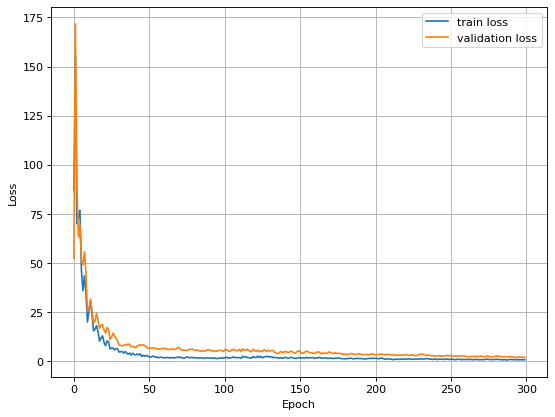

In [35]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(all_train_loss, label='train loss')
plt.plot(all_val_loss, label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


#References

https://becominghuman.ai/image-classification-with-tensorflow-2-0-without-keras-e6534adddab2

https://www.tensorflow.org/tutorials/keras/regression

https://www.tensorflow.org/guide/basic_training_loops

https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough

https://archive.ics.uci.edu/ml/datasets/auto+mpg
https://www.geeksforgeeks.org/what-is-the-difference-between-__init__-and-__call__/

https://pypi.org/project/pandas-profiling/